<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Model_Evaluation_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 75 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), 11.02 MiB | 4.39 MiB/s, done.


In [ ]:
!pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 3.2 MB/s eta 0:00:00


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title ,fontsize = 16 )
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False : 
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Pre

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.213,-2.052,-4.577,NaN,NaN,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.632,2.226,0.531,-2.137,-5.04,-6.57,-7.84,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-0.727,-2.876,-4.804,-7.220,-8.42,NaN,NaN,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.450,2.467,1.136,-1.32,-3.37,-5.31,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.087,-4.936,-5.254,-5.992,-6.39,-6.86,-7.42,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,15.093451,-72.166074,-0.232,0.796,0.248,-0.445,NaN,-2.54,-4.04,-6.3120,-7.3400,-8.2350,-9.4640,-13.6900,YSO,DSS
604,14.527078,-72.068717,-0.459,-0.388,-0.926,-1.672,-2.36,-2.83,-3.27,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
605,14.488457,-72.654396,-1.433,-0.683,-1.165,-1.937,-2.42,-3.14,-4.14,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
606,14.027887,-72.789808,-1.445,-1.084,-1.477,-2.014,-2.74,-3.09,-3.23,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS


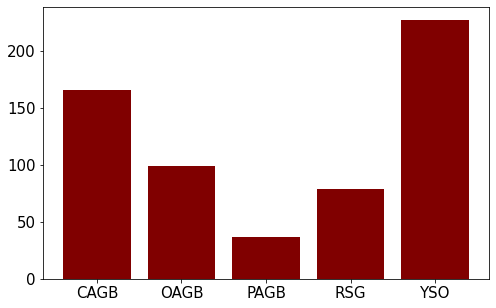

In [ ]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist.pdf',dpi=400)

In following cell we set a number for each label to help us in evaluate our models.

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
X = imp.fit_transform(X)

In the next cell, we use the Min Max scaler to scale data between 0 and 1. This algorithm helps models in training.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit(X)
X = MMS.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (547, 12)
X_test :  (61, 12)
Y_train :  (547,)
Y_test :  (61,)


# PRF

In [ ]:
!git clone https://github.com/ireis/PRF.git

Cloning into 'PRF'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 223 (delta 3), reused 6 (delta 2), pack-reused 211
Receiving objects: 100% (223/223), 15.34 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [ ]:
from PRF import PRF

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.01)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8852459016393442


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.85      0.88        13
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         6
           4       0.82      1.00      0.90        18

    accuracy                           0.89        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.86      0.89      0.87        61



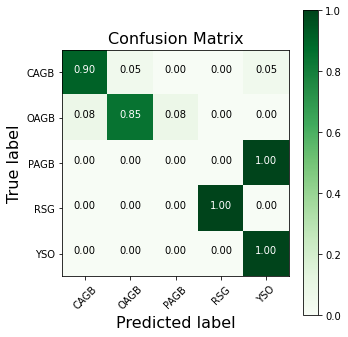

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9180327868852459


              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.81      1.00      0.90        13
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         6
           4       0.90      1.00      0.95        18

    accuracy                           0.92        61
   macro avg       0.94      0.90      0.91        61
weighted avg       0.93      0.92      0.92        61



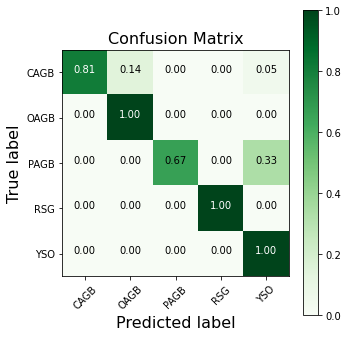

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.5)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9016393442622951


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.86      0.92      0.89        13
           2       0.50      0.33      0.40         3
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92        18

    accuracy                           0.90        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.90      0.90      0.90        61



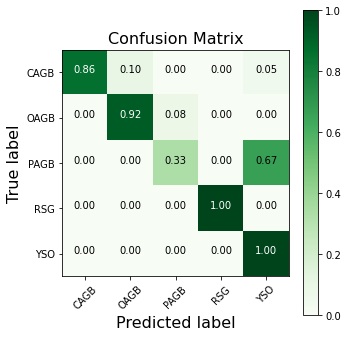

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.3)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9180327868852459


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.93      1.00      0.96        13
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         6
           4       0.85      0.94      0.89        18

    accuracy                           0.92        61
   macro avg       0.95      0.84      0.86        61
weighted avg       0.92      0.92      0.91        61



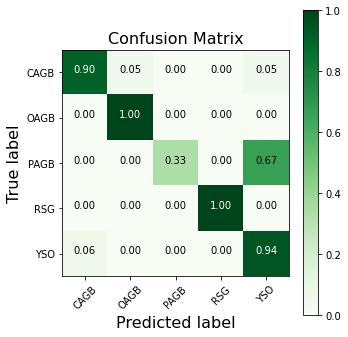

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
prf_cls = PRF.prf(n_estimators=10, bootstrap=True, keep_proba=0.8)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.8852459016393442


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       1.00      0.85      0.92        13
           2       0.50      0.33      0.40         3
           3       0.86      1.00      0.92         6
           4       0.89      0.94      0.92        18

    accuracy                           0.89        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.88      0.89      0.88        61



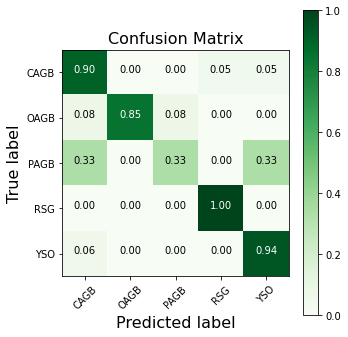

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
prf_cls = PRF.prf(n_estimators=100, bootstrap=True, keep_proba=0.1)
prf_cls.fit( X=X_train, y=np.array(Y_train))
Y_pred = prf_cls.predict(X_test)
print('PRF: {}'.format(prf_cls.score(X=X_test, y=np.array(Y_test))))

PRF: 0.9016393442622951


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.86      0.92      0.89        13
           2       0.50      0.33      0.40         3
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92        18

    accuracy                           0.90        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.90      0.90      0.90        61



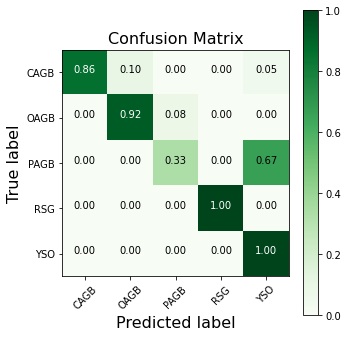

In [ ]:
print(classification_report( Y_test , Y_pred ))
cm = confusion_matrix(Y_test , Y_pred )
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = 'CSV.pdf',
                      size = (5,5))

In [ ]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(prf_cls)

In [ ]:
knn_from_pickle = pickle.loads(saved_model)  
# Use the loaded pickled model to make predictions
knn_from_pickle.predict(X_test)

array([4, 4, 0, 1, 3, 0, 0, 4, 0, 0, 0, 4, 2, 1, 4, 4, 1, 3, 1, 0, 2, 0,
       0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 1, 3, 3, 0, 1, 0, 4, 0, 3, 1, 4, 1,
       4, 0, 4, 4, 3, 0, 1, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1])

In [ ]:
from joblib import dump, load
dump(prf_cls,'PRF-08-10-92-0.joblib')

In [ ]:
model_name = 'PRF-08-10-92-0'
address = model_name + '.joblib'
clf = load(address)
Y_pred_save_model = clf.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       0.95      1.00      0.97        18

    accuracy                           0.98        61
   macro avg       0.99      0.99      0.99        61
weighted avg       0.98      0.98      0.98        61



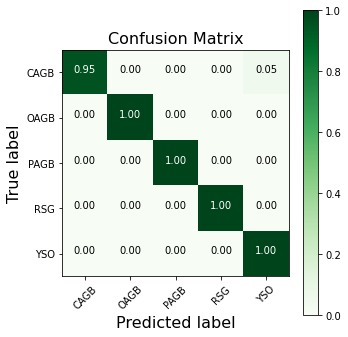

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

In [ ]:
Address_directory = '/content/drive/MyDrive/IPM/Dusty Stellar Sources Classification/Models/'
Models = ['PRF-03-10-98-2', 'PRF-08-10-98-1', 'PRF-08-50-93-0', 'PRF-09-10-92-0'] 

Model_name: PRF
Parameters: 
   keep_proba = 0.3
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        13
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         6
           4       0.95      1.00      0.97        18

    accuracy                           0.98        61
   macro avg       0.99      0.93      0.95        61
weighted avg       0.98      0.98      0.98        61



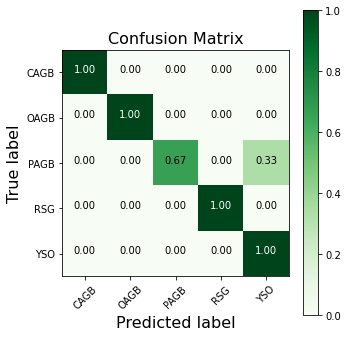

Model_name: PRF
Parameters: 
   keep_proba = 0.8
   n_stimator = 10
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6
           4       0.95      1.00      0.97        18

    accuracy                           0.98        61
   macro avg       0.99      0.99      0.99        61
weighted avg       0.98      0.98      0.98        61



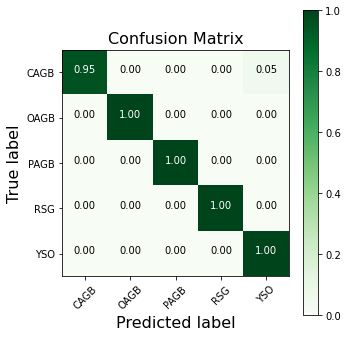

Model_name: PRF
Parameters: 
   keep_proba = 0.8
   n_stimator = 50
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       1.00      1.00      1.00        13
           2       1.00      0.33      0.50         3
           3       0.86      1.00      0.92         6
           4       0.86      1.00      0.92        18

    accuracy                           0.93        61
   macro avg       0.94      0.85      0.86        61
weighted avg       0.94      0.93      0.93        61



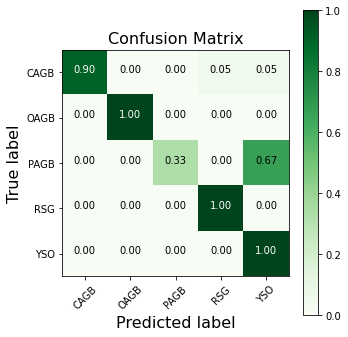

Model_name: PRF
Parameters: 
   keep_proba = 0.9
   n_stimator = 10
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.85      0.88        13
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         6
           4       0.90      1.00      0.95        18

    accuracy                           0.92        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.92      0.92      0.92        61



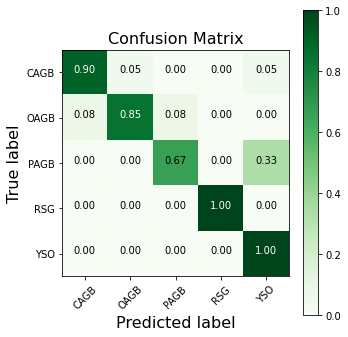

In [ ]:
for i in Models:
  model_name = i
  address = Address_directory + model_name + '.joblib'
  clf = load(address)
  Y_pred_save_model = clf.predict(X_test)
  Model_name = i.split('-')[0]
  keep_proba = i.split('-')[1].split('0')[1]
  n_stimator = i.split('-')[2]
  print('======================================================')
  print('Model_name: ' + Model_name)
  print('Parameters: ')
  print('   keep_proba = 0.' + keep_proba)
  print('   n_stimator = ' + n_stimator)
  print('======================================================')
  print(classification_report( Y_test , Y_pred_save_model ))
  cm = confusion_matrix(Y_test , Y_pred_save_model )
  plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

# SVC

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['poly'] ,
         'degree' : list(np.arange(1,20,1)),
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) + ['scale','auto'] ,
         'C': list(np.arange(0.1 , 0.5 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4, scoring = None )
GS.fit(X_train, Y_train)

CPU times: user 3min 29s, sys: 286 ms, total: 3min 29s
Wall time: 3min 36s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4],
                          'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                     14, 15, 16, 17, 18, 19],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8, 'scale',
                                    'auto'],
                          'kernel': ['poly']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8958243881494203
{'C': 0.2, 'degree': 4, 'gamma': 1.4000000000000001, 'kernel': 'poly'}


In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='poly' , degree = 4 ,C= 0.2 , gamma = 1.4 )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.79      0.85      0.81        13
           2       0.33      0.33      0.33         3
           3       0.86      1.00      0.92         6
           4       0.84      0.89      0.86        18

    accuracy                           0.84        61
   macro avg       0.75      0.78      0.76        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
from joblib import dump, load
dump(SV_model,'SVC-poly-84-0.joblib')

['SVC-poly-84-0.joblib']

In [ ]:
model_name = 'SVC-poly-84-0'
address = model_name + '.joblib'
clf = load(address)
Y_pred_save_model = clf.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.79      0.85      0.81        13
           2       0.33      0.33      0.33         3
           3       0.86      1.00      0.92         6
           4       0.84      0.89      0.86        18

    accuracy                           0.84        61
   macro avg       0.75      0.78      0.76        61
weighted avg       0.84      0.84      0.84        61



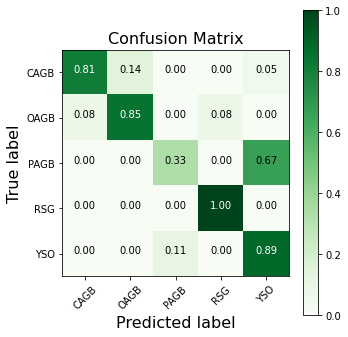

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVC = SVC()
par = [
       { 'kernel': ['linear', 'rbf'] ,
         'gamma' : list(np.arange(0.2 , 2 , 0.2 )) + ['scale','auto'] ,
         'C': list(np.arange(0.1 , 0.5 , 0.1 ))
        }
       ]
GS = GridSearchCV(SVC, param_grid=par, cv = 4 , scoring=None)
GS.fit(X_train, Y_train)

CPU times: user 2.96 s, sys: 4.94 ms, total: 2.97 s
Wall time: 2.96 s


GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.30000000000000004, 0.4],
                          'gamma': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2,
                                    1.4000000000000001, 1.6, 1.8, 'scale',
                                    'auto'],
                          'kernel': ['linear', 'rbf']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.8007191927866036
{'C': 0.4, 'gamma': 1.2, 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
SV_model = SVC(kernel='rbf', C= 0.4, gamma = 1.2 )
SV_model.fit(X_train, Y_train)
Y_pred = SV_model.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.69      0.85      0.76        13
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86         6
           4       0.82      1.00      0.90        18

    accuracy                           0.82        61
   macro avg       0.65      0.71      0.67        61
weighted avg       0.81      0.82      0.80        61



In [ ]:
from joblib import dump, load
dump(SV_model,'SVC-rbf-82-0.joblib')

['SVC-rbf-82-0.joblib']

In [ ]:
model_name = 'SVC-rbf-82-0'
address = model_name + '.joblib'
clf = load(address)
Y_pred_save_model = clf.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.69      0.85      0.76        13
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86         6
           4       0.82      1.00      0.90        18

    accuracy                           0.82        61
   macro avg       0.65      0.71      0.67        61
weighted avg       0.81      0.82      0.80        61



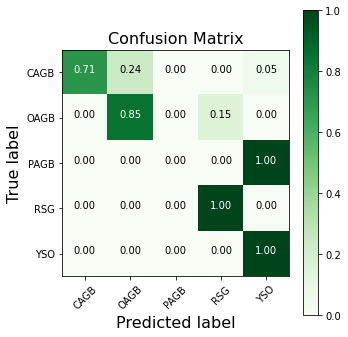

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit( X_train , Y_train )
Y_pred = GNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.65      0.85      0.73        13
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86         6
           4       0.76      0.89      0.82        18

    accuracy                           0.75        61
   macro avg       0.63      0.67      0.64        61
weighted avg       0.78      0.75      0.75        61



In [ ]:
from joblib import dump, load
dump(GNB,'GNB-75-0.joblib')

['GNB-75-0.joblib']

In [ ]:
model_name = 'GNB-75-0'
address = model_name + '.joblib'
clf = load(address)
Y_pred_save_model = clf.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.65      0.85      0.73        13
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86         6
           4       0.76      0.89      0.82        18

    accuracy                           0.75        61
   macro avg       0.63      0.67      0.64        61
weighted avg       0.78      0.75      0.75        61



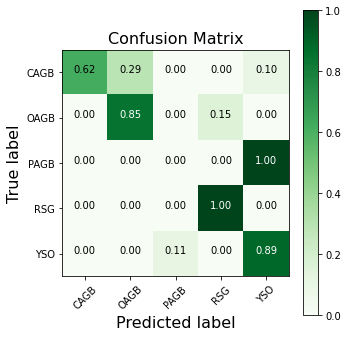

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import  MultinomialNB

MNB = MultinomialNB()
MNB.fit( X_train, Y_train )
Y_pred = MNB.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44        21
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.39      1.00      0.56        18

    accuracy                           0.43        61
   macro avg       0.18      0.28      0.20        61
weighted avg       0.30      0.43      0.32        61



# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier( n_neighbors = 5 , weights= 'distance' , n_jobs= 3 )
KNN.fit( X_train , Y_train )
Y_pred = KNN.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       1.00      0.85      0.92        13
           2       0.50      0.33      0.40         3
           3       0.86      1.00      0.92         6
           4       0.86      1.00      0.92        18

    accuracy                           0.90        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
from joblib import dump, load
dump(KNN,'KNN-90-0.joblib')

['KNN-90-0.joblib']

In [ ]:
model_name = 'KNN-90-0'
address = model_name + '.joblib'
clf = load(address)
clf.fit( X_train , Y_train )
Y_pred_save_model = clf.predict(X_test)

In [ ]:
print(classification_report( Y_test , Y_pred_save_model ))
cm = confusion_matrix(Y_test , Y_pred_save_model )

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.85      0.88        13
           2       0.50      0.33      0.40         3
           3       0.86      1.00      0.92         6
           4       0.86      1.00      0.92        18

    accuracy                           0.89        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.88      0.89      0.88        61



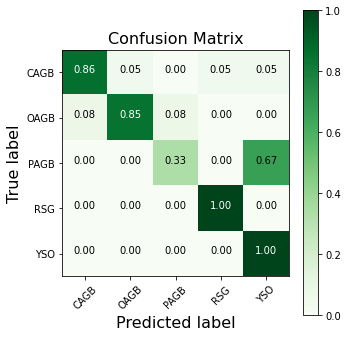

In [ ]:
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'] ,
                      title  = "Confusion Matrix",
                      file_name = model_name +'_CM.pdf',
                      size = (5,5))

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsClassifier(n_jobs=-1)
par = [
       { 
         'n_neighbors' : list(np.arange(1 , 10 , 1 )) ,
         'weights': ['distance' , 'uniform'] ,
          'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute' ]
        }
       ]
GS = GridSearchCV(KNN, param_grid=par, cv = 4, scoring = None)
GS.fit(X, Y)

CPU times: user 2.18 s, sys: 253 ms, total: 2.43 s
Wall time: 3.18 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['distance', 'uniform']}])

In [ ]:
print(GS.best_score_)
print(GS.best_params_)

0.837171052631579
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=4,\
                             min_samples_split=10, min_samples_leaf=3, random_state=2)
DTC.fit( X_train , Y_train )
Y_pred = DTC.predict(X_test)

print(classification_report( Y_test , Y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.86      0.92      0.89        13
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         6
           4       0.81      0.94      0.87        18

    accuracy                           0.87        61
   macro avg       0.72      0.74      0.73        61
weighted avg       0.85      0.87      0.85        61

